In [1]:
import os
os.chdir("/content/drive/MyDrive/IITG/SEM_2/IPML_PROJECT/DATA")

In [2]:
# !unzip DataLeaks_.zip

Streaming output truncated to the last 5000 lines.
  inflating: DataLeaks_train/c6/img_48412.jpg  
  inflating: DataLeaks_train/c6/img_31216.jpg  
  inflating: DataLeaks_train/c6/img_55145.jpg  
  inflating: DataLeaks_train/c6/img_80954.jpg  
  inflating: DataLeaks_train/c6/img_97539.jpg  
  inflating: DataLeaks_train/c6/img_86474.jpg  
  inflating: DataLeaks_train/c6/img_60169.jpg  
  inflating: DataLeaks_train/c6/img_62953.jpg  
  inflating: DataLeaks_train/c6/img_13590.jpg  
  inflating: DataLeaks_train/c6/img_77264.jpg  
  inflating: DataLeaks_train/c6/img_98836.jpg  
  inflating: DataLeaks_train/c6/img_93912.jpg  
  inflating: DataLeaks_train/c6/img_54020.jpg  
  inflating: DataLeaks_train/c6/img_25207.jpg  
  inflating: DataLeaks_train/c6/img_32912.jpg  
  inflating: DataLeaks_train/c6/img_82711.jpg  
  inflating: DataLeaks_train/c6/img_77815.jpg  
  inflating: DataLeaks_train/c6/img_9615.jpg  
  inflating: DataLeaks_train/c6/img_28697.jpg  
  inflating: DataLeaks_train/c6/img_74

In [3]:
import tensorflow as tf

5

# RESNET50 without Data Agumentation

In [4]:
class_labels= {'c0': 'Safe driving',
              'c1': 'Texting - right',
              'c2': 'Talking on the phone - right', 
              'c3': 'Texting - left', 
              'c4': 'Talking on the phone - left', 
              'c5': 'Operating the radio', 
              'c6': 'Drinking', 
              'c7': 'Reaching behind', 
              'c8': 'Hair and makeup', 
              'c9': 'Talking to passenger'}
class_label = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

image_size = (224, 224)
val_frac = 0.12
batch_size = 128
train_dir = "/content/drive/MyDrive/IITG/SEM_2/IPML_PROJECT/DATA/DataLeaks_train"

train_generator = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                             labels = 'inferred',
                                                             label_mode='categorical',
                                                             class_names = class_label,
                                                             image_size=image_size,
                                                             batch_size=batch_size,
                                                             seed=1,
                                                             shuffle=True,
                                                             validation_split=val_frac,
                                                             subset='training')
val_generator = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                             labels = 'inferred',
                                                             label_mode='categorical',
                                                             class_names = class_label,
                                                             image_size=image_size,
                                                             batch_size=batch_size,
                                                             seed=1,
                                                             shuffle=True,
                                                             validation_split=val_frac,
                                                             subset='validation')


Found 13697 files belonging to 10 classes.
Using 12054 files for training.
Found 13697 files belonging to 10 classes.
Using 1643 files for validation.


In [5]:
test_dir = "/content/drive/MyDrive/IITG/SEM_2/IPML_PROJECT/DATA/DataLeaks_test"

test_generator = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                             labels = 'inferred',
                                                             label_mode='categorical',
                                                             class_names = class_label,
                                                             image_size=image_size,
                                                             batch_size=batch_size,
                                                             seed=1,
                                                             shuffle=True)


Found 4646 files belonging to 10 classes.


# RESNET WITH DATA AGUMENTATION

In [ ]:
# Setting the data augmentation definition
rotation_range = 5
width_shift_range = 0.02
height_shift_range = 0.02
shear_range = 0.01
zoom_range = 0.05
horizontal_flip = False
fill_mode = "nearest"

train_datagen = ImageDataGenerator(
      rescale=1./255,
      height_shift_range=0.5,
      width_shift_range = 0.5,
      zoom_range = 0.5,
      rotation_range=30,
      validation_split=val_frac
      )

train_generator = train_datagen.flow_from_directory(
        train_dir,
        class_mode='categorical',
        target_size=image_size,
        batch_size=batch_size,
        seed=1,
        shuffle=True,
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        class_mode='categorical',
        target_size=image_size,
        batch_size=batch_size,
        seed=1,
        shuffle=True,
        subset='validation')

test_dir = "/content/drive/MyDrive/DATA/DataLeaks_test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        class_mode='categorical',
        target_size=image_size,
        batch_size=batch_size,
        seed=1,
        shuffle=True)

## AGUMENTAION TYPE 2

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [33]:
# Setting the data augmentation definition

gen_per_image = 1
gen_per_class = 200
rotation_range = 5
width_shift_range = 0.02
height_shift_range = 0.02
shear_range = 0.01
zoom_range = 0.05
horizontal_flip = False
fill_mode = "nearest"

In [34]:

height_shift_range = 0.02
shear_range = 0.01
zoom_range = 0.05
horizontal_flip = False
fill_mode = "nearest"

def increase_brightness(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def change_contrast(img, level):
    img = Image.fromarray(img.astype('uint8'))
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return np.array(img.point(contrast))

def pad_img(img):
    h, w = img.shape[:2]
    new_h = int((5 + secrets.randbelow(16)) * h / 100) + h
    new_w = int((5 + secrets.randbelow(16)) * w / 100) + w

    full_sheet = np.ones((new_h, new_w, 3)) * 255

    p_X = secrets.randbelow(new_h - img.shape[0])
    p_Y = secrets.randbelow(new_w - img.shape[1])

    full_sheet[p_X : p_X + img.shape[0], p_Y : p_Y + img.shape[1]] = img

    full_sheet = cv2.resize(full_sheet, (w, h), interpolation = cv2.INTER_AREA)

    return full_sheet.astype(np.uint8)

def preprocess_img(img):
    img = np.array(img)

    x = secrets.randbelow(2)

    if x == 0:
        # img = pad_img(img)
        img = increase_brightness(img, secrets.randbelow(26))
        img = change_contrast(img, secrets.randbelow(51))
    else:
        # img = pad_img(img)
        img = change_contrast(img, secrets.randbelow(51))
        img = increase_brightness(img, secrets.randbelow(26))

    return img


In [38]:
#Initialise the parameters for Augmentation.
datagen = ImageDataGenerator(
        rotation_range = rotation_range,
        width_shift_range = width_shift_range,
        height_shift_range = height_shift_range,
        shear_range = shear_range,
        zoom_range = zoom_range,
        horizontal_flip = horizontal_flip,
        fill_mode = fill_mode,
        validation_split = 0.2,
        preprocessing_function = preprocess_img)


train_data = datagen.flow_from_directory(train_dir,
                                        target_size= image_size,
                                        batch_size=batch_size,
                                        subset='training',seed=1,shuffle=True)

valid_data = datagen.flow_from_directory(train_dir,
                                        target_size=image_size,
                                        batch_size=batch_size,
                                        subset='validation',seed=1,shuffle=True)

Found 11283 images belonging to 10 classes.
Found 2817 images belonging to 10 classes.


# TRAINING RESNET

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense,GlobalAveragePooling2D
from keras.layers import Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image 
from keras.layers import BatchNormalization
from keras import optimizers

In [7]:
from keras.layers import Input
## The RESNET model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50

#Use the generated model 
from keras.models import Model
from keras.callbacks import LearningRateScheduler

In [43]:
def get_compiled_model():
    resnet50_input = Input(shape = (224, 224, 3), name = 'Image_input')
    
    #Get the RESNET weights and layers
    model_resnet50_conv = ResNet50(weights= 'imagenet', include_top=False, input_shape= (224,224,3))
    model_resnet50_conv.trainable = False
    
#     print("RESNET_SUMMARY")
#     model_resnet50_conv.summary()
    
    output_resnet50_conv = model_resnet50_conv(resnet50_input)
    
    # add adaptive average pooling layer
    x = GlobalAveragePooling2D()(output_resnet50_conv)
    
    x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    # x=Dense(512,activation='relu')(x) #dense layer 3
    x = Dense(10, activation='softmax', name='predictions')(x)

    # x = Dense(10, activation='softmax', name='predictions')(x)
    
    print("COMPLETE MODEL SUMMARY")
    resnet50_pretrained = Model(inputs = resnet50_input, outputs = x)
    resnet50_pretrained.summary()
    # sgd = optimizers.SGD(lr = 0.001)
    resnet50_pretrained.compile(optimizer=tf.keras.optimizers.Adam(),
                                loss='categorical_crossentropy',
                                metrics=['accuracy'])
    
    
    return resnet50_pretrained

In [44]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print("Number of devices: {}".format(strategy.num_replicas_in_sync))

# Open a strategy scope.
with strategy.scope():
    # Everything that creates variables should be under the strategy scope.
    # In general this is only model construction & `compile()`.
    resnet50_pretrained = get_compiled_model()    

Number of devices: 1
COMPLETE MODEL SUMMARY
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Image_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_2 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dro

In [10]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
MODEL_PATH = "/content/drive/MyDrive/IITG/SEM_2/IPML_PROJECT/DATA"
filepath = os.path.join(MODEL_PATH,"distracted-{epoch:02d}-{val_accuracy:.2f}.hdf5")

checkpointer1 = ModelCheckpoint('resnet_weights_aug_alltrained_sgd2_setval.hdf5', verbose=1, save_best_only=True)
checkpointer2 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# earlystopper = EarlyStopping(monitor='accuracy', patience=7, verbose=1)

In [ ]:
# Fits the model on batches with real-time data augmentation:
resnet50_model = resnet50_pretrained.fit(
    train_generator,
    batch_size = 128,
    callbacks=[checkpointer1, checkpointer2],
    epochs = 5,
    verbose = 1,
    validation_data = val_generator,
    validation_batch_size=128
)


Epoch 1/5
 7/97 [=>............................] - ETA: 4:55 - loss: 2.9114 - accuracy: 0.1228

In [15]:
from matplotlib import pyplot as plt

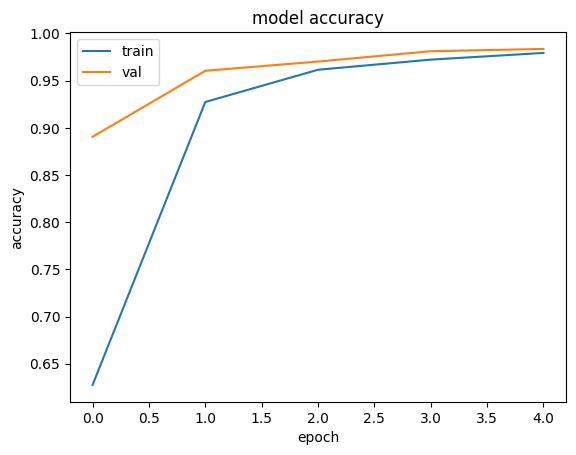

In [25]:
plt.plot(resnet50_model.history['accuracy'])
plt.plot(resnet50_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

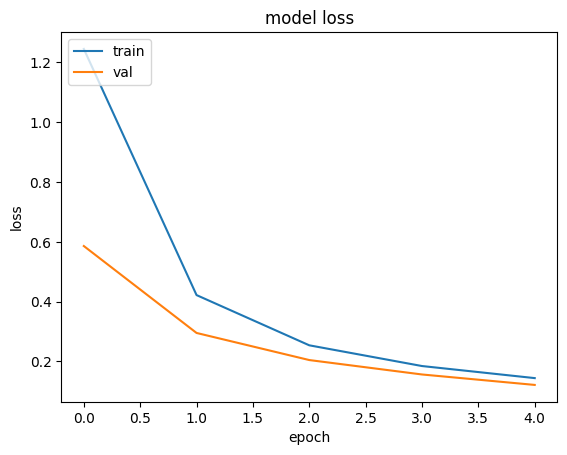

In [17]:
plt.plot(resnet50_model.history['loss'])
plt.plot(resnet50_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#save model history as dict.
import pickle
with open('/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
#load history
with open('/trainHistoryDict', "rb") as file_pi:
    history = pickle.load(file_pi)

In [ ]:
val_loss, val_acc = resnet50_model.evaluate(val_generator)
(val_loss, val_acc)

In [13]:
test_loss, test_acc = resnet50_pretrained.evaluate(test_generator)
(test_loss, test_acc)

37/37 [==============================] - 482s 10s/step - loss: 5.0290 - accuracy: 0.3870


(5.028994083404541, 0.38699957728385925)

clearly model is overfitted training data. Need

In [10]:
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,  
        math.floor((1+epoch)/epochs_drop))
    return lrate
lrate = LearningRateScheduler(step_decay)

# Quantization Aware Training

In [18]:
# SETTING UP PRETRAINED MODEL
CHECKPOINT_PATH = "/content/drive/MyDrive/IITG/SEM_2/IPML_PROJECT/DATA/resnet_weights_aug_alltrained_sgd2_setval.hdf5"
model = get_compiled_model()
model.load_weights(CHECKPOINT_PATH)

COMPLETE MODEL SUMMARY
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Image_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 predictions (Dense)         (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [19]:
def apply_quantization_to_dense(layer):
    if isinstance(layer, tf.keras.layers.Dense):
        return tfmot.quantization.keras.quantize_annotate_layer(layer)
    return layer

In [20]:
!pip install tensorflow_model_optimization
import tensorflow_model_optimization as tfmot  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 46.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [21]:
annotated_model = tf.keras.models.clone_model(
    model,
    clone_function=apply_quantization_to_dense,
)

In [22]:
# Build Model
annotated_model.build((None, 224,224,3))


# Now that the Dense layers are annotated,
# `quantize_apply` actually makes the model quantization aware.
quant_aware_model = tfmot.quantization.keras.quantize_apply(annotated_model)

In [23]:
# Define Optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.03)

# `quantize_model` requires a recompile.
quant_aware_model.compile(
    optimizer=optimizer, 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [24]:
import time
# Load datasets
# X_train, X_test, X_valid, y_train, y_valid, y_test = get_correct_dimensions()


# Define Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
      min_delta=0.1, # minimium amount of change to count as an improvement
      patience=20, # how many epochs to wait before stopping
      restore_best_weights=True,
  )


# run = wandb.init(project='Quantization Aware Training')


# Define the callbacks
callbacks = [
      keras.callbacks.TensorBoard(log_dir='./logs'),
      early_stopping
  ]


# Train model and save history
start = time.time()


history_quant_aware = quant_aware_model.fit(
      train_generator, 
      validation_data= val_generator, 
      batch_size=128, 
      epochs=25,
      callbacks=callbacks
      )


end = time.time()


print(f"Total Time taken for Model Training: {end - start} seconds.")

Epoch 1/25
95/95 [==============================] - 60s 559ms/step - loss: 18.6012 - accuracy: 0.1388 - val_loss: 31.8547 - val_accuracy: 0.1229
Epoch 2/25
95/95 [==============================] - 57s 577ms/step - loss: 44.8026 - accuracy: 0.1302 - val_loss: 57.0687 - val_accuracy: 0.1229
Epoch 3/25
95/95 [==============================] - 56s 557ms/step - loss: 68.8600 - accuracy: 0.1302 - val_loss: 80.0616 - val_accuracy: 0.1229
Epoch 4/25
95/95 [==============================] - 54s 540ms/step - loss: 92.9052 - accuracy: 0.1302 - val_loss: 115.9106 - val_accuracy: 0.1229
Epoch 5/25
95/95 [==============================] - 56s 555ms/step - loss: 144.7261 - accuracy: 0.1310 - val_loss: 165.8808 - val_accuracy: 0.1229
Epoch 6/25
95/95 [==============================] - 58s 585ms/step - loss: 193.3087 - accuracy: 0.1304 - val_loss: 211.2097 - val_accuracy: 0.1229
Epoch 7/25
95/95 [==============================] - 65s 640ms/step - loss: 237.4861 - accuracy: 0.1302 - val_loss: 252.4228 -

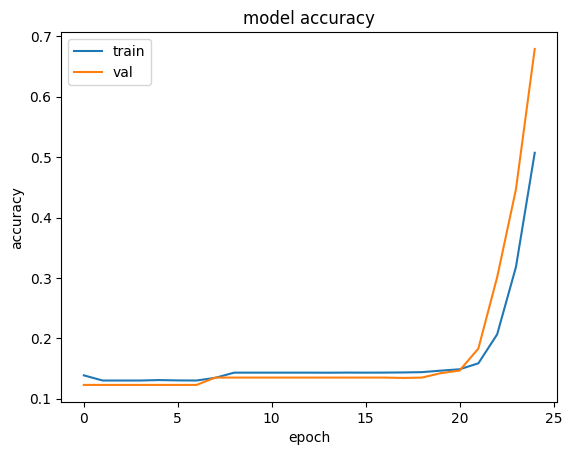

In [26]:
plt.plot(history_quant_aware.history['accuracy'])
plt.plot(history_quant_aware.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

continiuing traing from last epoch

In [27]:
import time
# Load datasets
# X_train, X_test, X_valid, y_train, y_valid, y_test = get_correct_dimensions()


# Define Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
      min_delta=0.1, # minimium amount of change to count as an improvement
      patience=20, # how many epochs to wait before stopping
      restore_best_weights=True,
  )


# run = wandb.init(project='Quantization Aware Training')


# Define the callbacks
callbacks = [
      keras.callbacks.TensorBoard(log_dir='./logs'),
      early_stopping
  ]


# Train model and save history
start = time.time()


history_quant_aware_ = quant_aware_model.fit(
      train_generator, 
      validation_data= val_generator, 
      batch_size=128, 
      epochs=25,
      callbacks=callbacks
      )


end = time.time()


print(f"Total Time taken for Model Training: {end - start} seconds.")

Epoch 1/25
95/95 [==============================] - 55s 552ms/step - loss: 1.8397 - accuracy: 0.7725 - val_loss: 1.6393 - val_accuracy: 0.8570
Epoch 2/25
95/95 [==============================] - 54s 542ms/step - loss: 1.1203 - accuracy: 0.9079 - val_loss: 2.1772 - val_accuracy: 0.9245
Epoch 3/25
95/95 [==============================] - 54s 538ms/step - loss: 0.6684 - accuracy: 0.9542 - val_loss: 0.8183 - val_accuracy: 0.9714
Epoch 4/25
95/95 [==============================] - 54s 543ms/step - loss: 0.4660 - accuracy: 0.9712 - val_loss: 0.4847 - val_accuracy: 0.9848
Epoch 5/25
95/95 [==============================] - 55s 548ms/step - loss: 0.3578 - accuracy: 0.9774 - val_loss: 0.8041 - val_accuracy: 0.9750
Epoch 6/25
95/95 [==============================] - 55s 547ms/step - loss: 0.2783 - accuracy: 0.9845 - val_loss: 0.5288 - val_accuracy: 0.9866
Epoch 7/25
95/95 [==============================] - 54s 543ms/step - loss: 0.1273 - accuracy: 0.9907 - val_loss: 0.3840 - val_accuracy: 0.9848

KeyboardInterrupt: ignored

In [28]:
plt.plot(history_quant_aware_.history['accuracy'])
plt.plot(history_quant_aware_.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: ignored